In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from shapely import Polygon,Point,MultiPoint,LineString
from scipy.spatial import ConvexHull
from itertools import combinations
from shapely.ops import unary_union
from IPython.display import display, clear_output
from matplotlib import animation
from sympy import symbols
import numpy.matlib
import matplotlib.colors as mcolors
import shapely as shapely
import random
def getPotRegions(X,imp):
    Bx= np.zeros((len(X),4,2));
    for i in range(len(X)):
        Bx[i,0,:]= [X[i][0]-imp, X[i][1]+imp]
        Bx[i,1,:]= [X[i][0]+imp, X[i][1]+imp]
        Bx[i,2,:]= [X[i][0]+imp, X[i][1]-imp]
        Bx[i,3,:]= [X[i][0]-imp, X[i][1]-imp]
    return(Bx);
def getPotRegions_var(X,imp):
    Bx= np.zeros((len(X),4,2));
    for i in range(len(X)):
        Bx[i,0,:]= [X[i][0]-imp[i], X[i][1]+imp[i]]
        Bx[i,1,:]= [X[i][0]+imp[i], X[i][1]+imp[i]]
        Bx[i,2,:]= [X[i][0]+imp[i], X[i][1]-imp[i]]
        Bx[i,3,:]= [X[i][0]-imp[i], X[i][1]-imp[i]]
    return(Bx);
def getPotRegions_var2(X,imp):
    Bx= np.zeros((len(X),4,2));
    for i in range(len(X)):
        Bx[i,0,:]= [float(X[i][0]-imp[i]), float(X[i][1]+imp[i])]
        Bx[i,1,:]= [float(X[i][0]+imp[i]), float(X[i][1]+imp[i])]
        Bx[i,2,:]= [float(X[i][0]+imp[i]), float(X[i][1]-imp[i])]
        Bx[i,3,:]= [float(X[i][0]-imp[i]), float(X[i][1]-imp[i])]
    return(Bx);
def CPIH_Safepoint(n,Bx,Xi):
    k = int(np.floor(2/3*n)+1);
    n = np.arange(n);

    combk = list(combinations(n,k));
    safeX = [];
    safeY =[];
    first= True;
    CPIH= Polygon();
    #testing
   
    for C in combk:
        if Xi in C:
            comb3 = list(combinations(C,3));
            dp1 =[];
            Chull = Polygon();
            for i in range(len(comb3)):
                comb2 = list(combinations(comb3[i][:],2))
                b1 = int(comb3[i][0]);
                b2 = int(comb3[i][1]);
                b3 = int(comb3[i][2]);
                dp1 = np.vstack((Bx[b1,:,:],Bx[b2,:,:],Bx[b3,:,:]));
                idx = ConvexHull(dp1);
                dp1 = Polygon(dp1[idx.vertices,:]);
                dp2 = Polygon();
                for j in range(len(comb2)):
                    a1 = comb2[j][0];
                    a2 = comb2[j][1];
                    temp= np.vstack((Bx[a1,:,:],Bx[a2,:,:]));
                    idx = ConvexHull(temp);
                    temp =  Polygon(temp[idx.vertices,:]);
                    dp2 = unary_union([dp2,temp])
                diff = dp1.difference(dp2);
                Chull= unary_union([Chull,diff]);


            if (first and not Chull.is_empty):
                CPIH = Polygon(Chull.convex_hull);

            else:
                #NEW 
                if not Chull.is_empty:
                    Chull = Polygon(Chull.convex_hull);
                #ENDNEW
                CPIH = CPIH.intersection(Chull);
                if not CPIH.geom_type == 'Polygon' and not CPIH.is_empty:

                    for member in CPIH.geoms:
                        if member.geom_type == 'Polygon':
                            CPIH = member;


                if CPIH.is_empty:
                    return [0,0];
                    break;
            first = False;
    safeX,safeY = np.array(CPIH.exterior.xy)
        #safeX.append(x);
        #safeY.append(y);
    return [safeX,safeY];
    #return CPIH
def maxDist(Xi,safeX,safeY):
    max_dist = 0;
    max_indx = [];
    for i in range(len(safeX)):
        norm = np.linalg.norm(Xi-[safeX[i],safeY[i]]);
        if norm> max_dist:
            max_dist = norm;
            max_indx = [];
            max_indx.append(i);
        elif norm == max_dist:
            max_indx.append(i);
            
    return [np.mean(safeX[max_indx]),np.mean(safeY[max_indx])],max_dist;
def minOrthProj(Xi,Xj,X,f):
    JI = Xj-Xi;
    mindist = 100;
    for i in range(len(X)-f):
        if any(X[i] != Xi) and any(X[i] != Xj):
            AB = X[i]-Xi;
            
            AB_orth = np.array([-AB[1],AB[0]]);
            alt = np.linalg.norm(np.dot(AB_orth,JI)/pow(np.linalg.norm(AB_orth),2)*AB_orth);
            if alt < mindist:
                mindist = alt;
    return mindist;

def get_colors(n,f):
    colors = [plt.cm.get_cmap('viridis',n-f)(i) for i in range(n-f)];
    for attacker in range(f):
        colors.append('r')
    return colors
def ExtractX(lst,i):
    return [item[i][0] for item in lst]
def ExtractY(lst,i):
    return [item[i][1] for item in lst]

def plothull(X):
    hull = ConvexHull(X);
    hullx = np.append(X[hull.vertices,0],X[hull.vertices[0],0]);
    hully = np.append(X[hull.vertices,1],X[hull.vertices[0],1]);
    plt.plot(hullx,hully);
def calcsafepoint(n,Bx):
    n = np.arange(n);
    comb3 = list(combinations(n,3));
    safeX = [];
    safeY =[];
    dp1 =[]
    for i in range(len(comb3)):
        comb2 = list(combinations(comb3[i][:],2))
        b1 = int(comb3[i][0]);
        b2 = int(comb3[i][1]);
        b3 = int(comb3[i][2]);
        dp1 = np.vstack((Bx[b1,:,:],Bx[b2,:,:],Bx[b3,:,:]));
        idx = ConvexHull(dp1);
        dp1 = Polygon(dp1[idx.vertices,:]);
        dp2 = Polygon();
        for j in range(len(comb2)):
            a1 = comb2[j][0];
            a2 = comb2[j][1];
            temp= np.vstack((Bx[a1,:,:],Bx[a2,:,:]));
            idx = ConvexHull(temp);
            temp =  Polygon(temp[idx.vertices,:]);
            dp2 = unary_union([dp2,temp])
        diff = dp1.difference(dp2);
        x,y = np.array(diff.exterior.xy)
        safeX.append(x);
        safeY.append(y);
    return [safeX,safeY]; 
def DBCPIH(n,Xn,Xi):
    k = int(np.floor(2/3*n)+1);
    n = np.arange(n);
    DBCPIH= Polygon();
    combk = list(combinations(n,k));
    safeX = [];
    safeY =[];
    first= True;
  
    for C in combk:
        v =[]
        comb3 = list(combinations(C,3));
        for i in range(len(comb3)):
            safePoint = 1/3*(Xn[comb3[i][0]][:]+Xn[comb3[i][1]][:]+Xn[comb3[i][2]][:]);
            v.append(safePoint)
        v_empty = True
        
        for array in v:
            if v_empty:
                temp = array
                v_empty = False
            else:
                temp= np.vstack((temp,array));
      
        idx = ConvexHull(temp)
      
        Chull  = Polygon(temp[idx.vertices][:])
        if (first and DBCPIH.is_empty):
                DBCPIH = Polygon(Chull.convex_hull);
                first = False;
        else:
            DBCPIH = DBCPIH.intersection(Chull)
           
    if DBCPIH.geom_type == 'Polygon':
        safeX,safeY = np.array(DBCPIH.exterior.xy)
        return np.array((np.mean(safeX), np.mean(safeY)))
    elif DBCPIH.geom_type == 'Point':
        try:
            safeX,safeY = [DBCPIH.x, DBCPIH.y];
        except:
            safeX,safeY = np.array((0,0))
        print(np.array((safeX,safeY)))
        return np.array((safeX,safeY)).T
def getCenterpoint(n,X,i):
    n = np.arange(n);
    combk = list(combinations(n,5));
    safeX = [];
    safeY =[];
    dp1 =[]
    first = True;
    success = True;
    safeHull = Polygon();
    for comb in combk:
        Xc= np.zeros((5,2));
        j = 0;
        for idx in comb:
            Xc[j,:] = X[idx,:];
            j+=1;
        hullk = ConvexHull(Xc);
         
        dp1 = Polygon(Xc[hullk.vertices,:]);
        if safeHull.is_empty:
            safeHull = dp1;
        try:
            safeHull = safeHull.intersection(dp1);
        except:
            print("could not compute centerpoint for ",X)
            safeHull = safeHull
            success = False
    if safeHull.geom_type == 'Polygon':
        safeX,safeY = np.array(safeHull.exterior.xy)
        if safeX == [] or safeY == []:
            safeX = 0
            safeY = 0
        return[safeX,safeY]
    elif safeHull.geom_type == 'LineString' or safeHull.geom_type == "Point":
        safepoints = np.array(shapely.get_coordinates(safeHull).tolist())
        safeX = safepoints[:,0]
        safeY = safepoints[:,1]
    elif safeHull is None:
        return [0,0]
    else:
        return [0,0]
        
      

In [24]:
def Intersect(a1,a2,b1,b2):
    x = (b2-b1)/(a1-a2)
    y = a1*x+b1
    return (np.array((x,y)))
    
def TukeyMedian(X):
    temp =[]
    k_levels = []
    lower_klevels = []
    upper_klevels = []
    idx = 0
    step =0
    pointies =[]
    checkpoints = []
    minX = np.abs(min(X[:,0]))
    minY = np.abs(min(X[:,1]))
    offset = max(minX,minY)
    for x in X:
        x[0] = x[0]+offset
        x[1] = x[1]+offset
    for n in range(len(X)-1):
        k_levels.append([])
        lower_klevels.append([])
        upper_klevels.append([])
    for n in range(len(X)):
        a1 = X[n][0]
        b1 = X[n][1]
        for q in range(n+1,len(X)):
            a2 =X[q][0]
            b2 = X[q][1]
            
            if not (a1 == a2 and b1 == b2):
               
                if a1 != a2:
                    point= Intersect(-a1,-a2,b1,b2)
                    k,val = vert_intersect(X,point)
                   # for z in range(k+1):
                    k_levels[k].append(point)
                    if val == -1:
                        lower_klevels[k].append(point)
                    if val ==1:
                        upper_klevels[k].append(point)
    
    for i in range(len(k_levels)):
        arr = np.array(k_levels[i])
        k_levels[i] = np.unique(arr, axis =0)
        if len(k_levels[i])>0:
            idx = i;
    empty = True
    while empty:
        empty,kverts,pointies = checkPrimal(k_levels[idx],upper_klevels[idx],lower_klevels[idx],idx)
        if idx == 2:
            checkpoints = pointies
        step = step+1
        if empty and idx != 0:
            idx = idx-1;
        if step>200:
            
            empty = False
    arr = np.array(kverts)
    kverts = np.unique(arr,axis=0)
    for v in kverts:
        v[0] = v[0]-offset
        v[1] = v[1]-offset
    for c in checkpoints:
        c[0] = c[0]-offset
        c[1] = c[1]-offset
    for x in X:
        x[0] = x[0]-offset
        x[1] = x[1]-offset
    if len(kverts)>2:
        try:
            index = ConvexHull(kverts);
            kverts=  kverts[index.vertices,:]
        except:
            index = 0
    
    return idx#,kverts,checkpoints#,upper_klevels,lower_klevels,k_levels,checkpoints
                     
def vert_intersect(X,point):
    upper = 0
    lower = 0
    k =0
    for x in X:
        a = -x[0]
        b = x[1]
        if (a*point[0]+b>point[1] and np.abs(a*point[0]+b- point[1])>.000001):
            upper= upper+1
        if (a*point[0]+b<point[1] and np.abs(a*point[0]+b- point[1])>.000001):
            lower = lower+1
    if lower<upper:
        k = lower
        return (k,-1)
    if upper<lower:
        k = upper
        return(k,1)
    if upper == lower:
        k = upper
        return(k,0)
def checkPrimal(k_levels,upper_klevels,lower_klevels,idx):
    intersection_empty = True
    kverts =[]
    pointies = []
    for i in range(len(k_levels)-1):
        a1 = k_levels[i][0];
        b1 = k_levels[i][1];
        for j in range(i+1,len(k_levels)):
            a2 = k_levels[j][0];
            b2 = k_levels[j][1];
            if a1 != a2:
                m = (b1-b2)/(a1-a2)
                b = b1-m*a1
                point = np.array((m,b))
           # if a1 != a2:
            #    point = Intersect(a1,a2,b1,b2)
                pointies.append(np.array((-point[0],point[1])))
               
                lower_intersection = True
                upper_intersection = True
                for l in lower_klevels:
                    if point[1]<-l[0]*point[0]+l[1]-.00001:
                        lower_intersection = False
                for u in upper_klevels:
                    if point[1]>-u[0]*point[0]+u[1]+.00001:
                        upper_intersection = False
                if upper_intersection and lower_intersection:
                    intersection_empty = False
                    point[0] = -point[0]
                    kverts.append(point)

    return intersection_empty,kverts,pointies
    

In [6]:
def attackerTarget(X,pos):
    n = (int)(np.floor(len(X)/2))
    X = X[X[:,0].argsort()]
    left = X[0:n]
    right = X[n: ]
    for l in left:
        l_idx = np.where(left ==l)[0][0]
        for l2 in left[l_idx:,:]:
            l2_idx = np.where(left ==l)[0][0]
            if not (l ==l2).all():
                lm = (l2[1]-l[1])/(l2[0]-l[0])
                lb = l2[1]-l2[0]*lm
                if l2_idx<len(left)-1:
                    left_minus = np.vstack((left[0:l_idx],left[l_idx+1:l2_idx],left[l2_idx+1,:]))
                else:
                    left_minus = np.vstack((left[0:l_idx],left[l_idx+1:l2_idx]))
                if isFacet(lm,lb,left_minus):
                    for r in right:
                        r_idx = np.where(right ==r)[0][0]
                        for r2 in right[r_idx:,:]:
                            r2_idx = np.where(right ==r2)[0][0]
                            if not (r == r2).all():
                                rm = (r2[1]-r[1])/(r2[0]-r[0])
                                rb = r2[1]-r2[0]*rm
                                if r2_idx<len(right)-1:
                                    right_minus = np.vstack((right[0:r_idx],right[r_idx+1:r2_idx],right[r2_idx+1,:]))
                                else:
                                    right_minus = np.vstack((right[0:r_idx],right[r_idx+1:r2_idx]))
                                if isFacet(rm,rb,right_minus):
                                    px = (rb-lb)/(lm-rm)
                                    py = rm*px+rb
                                    if (l==np.array((7,100))).all() and (l2==np.array((20,2))).all() and (r ==np.array((56,51))).all() and (r2 ==np.array((91,83))).all():
                                        point = np.array((px,py))

    return point
def isFacet(m,b,points):
    if len(points) == 0:
        return True
    else:
        facet = False
        under = 0
        for p in points:
            if p[1] < m*p[0]+b:
                under = under+1;
        if under == 0 or under == len(points):
            facet = True
        return facet
    

In [36]:
def _d2xy_hilbert(d, p):
    """Converts a 1D Hilbert distance 'd' to a 2D (x, y) coordinate."""
    x, y = 0, 0
    s = 1
    while s < (1 << p):
        rx = 1 & (d >> 1)
        ry = 1 & (d ^ rx)
        if ry == 0:
            if rx == 1:
                x = s - 1 - x
                y = s - 1 - y
            x, y = y, x
        x += s * rx
        y += s * ry
        d >>= 2
        s <<= 1
    return x, y

def _xy2d_hilbert(x, y, p):
    """Converts a 2D (x, y) coordinate to a 1D Hilbert distance 'd'."""
    d = 0
    s = 1 << (p - 1)
    while s > 0:
        rx = 1 if (x & s) > 0 else 0
        ry = 1 if (y & s) > 0 else 0
        d += s * s * ((3 * rx) ^ ry)
        if ry == 0:
            if rx == 1:
                x = (1 << p) - 1 - x
                y = (1 << p) - 1 - y
            x, y = y, x
        s >>= 1
    return d

# --- Main Function ---

def find_hilbert_median(points, p=32):
    """
    Finds a geometrically consistent 2D median by aligning the data with PCA
    before applying a Hilbert curve parameterization.

    Args:
        points (np.ndarray): An n x 2 array of 2D points.
        p (int): The bit precision for the Hilbert curve grid (e.g., p=16 for a 65536x65536 grid).

    Returns:
        np.ndarray: A 1x2 array representing the calculated 2D median.
    """
    if points.ndim != 2 or points.shape[1] != 2:
        raise ValueError("Input must be an n x 2 array of points.")

    # 1. Standardize Orientation (PCA)
    mean = np.mean(points, axis=0)
    centered_points = points - mean
    cov_matrix = np.cov(centered_points, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvectors by eigenvalues to get the rotation matrix
    sort_indices = np.argsort(eigenvalues)[::-1]
    rotation_matrix = eigenvectors[:, sort_indices]
    
    # Rotate the data to align with principal components
    rotated_points = centered_points @ rotation_matrix
    #rotated_points = centered_points
    # 2. Scale Rotated Data to Integer Grid
    min_vals = np.min(rotated_points, axis=0)
    max_vals = np.max(rotated_points, axis=0)
    scale = (max_vals - min_vals)
    # Avoid division by zero for degenerate cases (e.g., all points are the same)
    scale[scale == 0] = 1 

    grid_size = (1 << p) - 1
    scaled_points = (rotated_points - min_vals) / scale * grid_size
    integer_points = np.round(scaled_points).astype(int)

    # 3. Hilbert Curve Mapping and 1D Median
    hilbert_values = np.array([
        _xy2d_hilbert(pt[0], pt[1], p) for pt in integer_points
    ])
    median_d = np.median(hilbert_values)
    
    # 4. Inverse Mapping to Find Final 2D Point
    # Handle the case where the median is between two integers
    d_floor, d_ceil = int(np.floor(median_d)), int(np.ceil(median_d))
    
    xy_floor = np.array(_d2xy_hilbert(d_floor, p))
    if d_floor == d_ceil:
        median_xy_scaled = xy_floor
    else:
        xy_ceil = np.array(_d2xy_hilbert(d_ceil, p))
        # Interpolate between the two points
        median_xy_scaled = xy_floor + (xy_ceil - xy_floor) * (median_d - d_floor)

    # Un-scale the point
    median_xy_rotated = (median_xy_scaled / grid_size) * scale + min_vals
    
    # Un-rotate the point (inverse rotation is the transpose)
    median_xy_centered = median_xy_rotated @ rotation_matrix.T
    
    # Add the mean back
    hilbert_median = median_xy_centered + mean

    return hilbert_median

In [76]:
X = np.array(((60,24),(56,51),(49,53),(50,16),(91,83),(7,100),(20,2)))
idx = TukeyMedian(X)
l = attackerTarget(X,1)
print(l)

[18.09698388 16.34581383]


In [74]:
n = (int)(np.floor(len(X)/2))
X = X[X[:,0].argsort()]
left = X[0:n]
right = X[n: ]
left_minus = np.vstack((left[0:1],left[2:]))
for l in left:
    l_idx = np.where(left== l)[0][0]
    print(l_idx)
for r2 in right[2:,:]:
    print(r2)
print(right)

0
1
2
[60 24]
[91 83]
[[50 16]
 [56 51]
 [60 24]
 [91 83]]


In [29]:
for x in X:
    for x2 in X:
        if (x==x2).all():
            print(x, "=" ,x2)

[60 24] = [60 24]
[56 51] = [56 51]
[49 53] = [49 53]
[50 16] = [50 16]
[91 83] = [91 83]
[  7 100] = [  7 100]
[20  2] = [20  2]


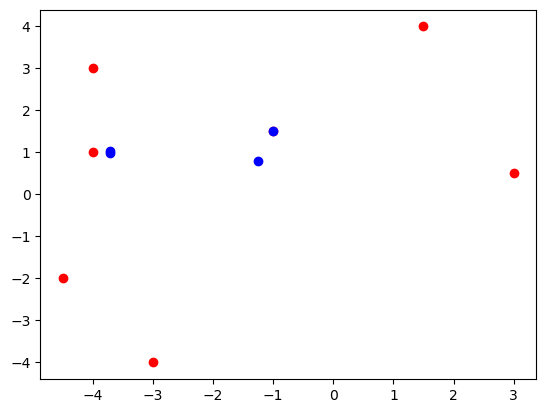

In [25]:
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c = 'r')
ax.scatter(kverts[:,0],kverts[:,1],c ='b')

In [28]:
print(min(X[:,0]))
      

-4.5


C:\Users\85chr\AppData\Local\Temp\ipykernel_12296\3495451480.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [plt.cm.get_cmap('viridis',n-f)(i) for i in range(n-f)];
C:\Users\85chr\AppData\Local\Temp\ipykernel_12296\2844810315.py:72: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[i,0],X[i,1],c= colors[i], marker = 'o',label = lbl,s =50);


no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Safepoints
no Saf

C:\Users\85chr\AppData\Local\Temp\ipykernel_12296\2844810315.py:148: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xplot[endn-1],yplot[endn-1],c = colors[i], marker='x',s=50);


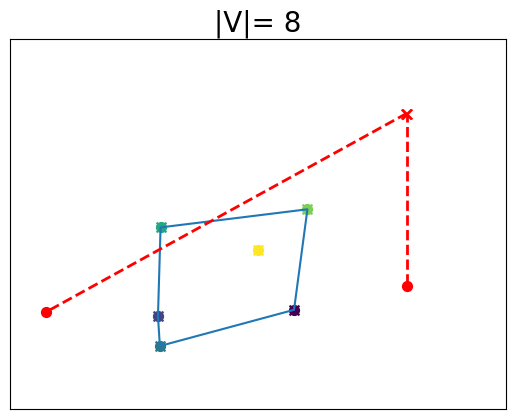

In [24]:
fig, ax = plt.subplots()
#fig2,ax2 = plt.subplots()

n = 8
offset = np.ones((n,2))*.5;
X= 10*(np.random.rand(n,2)-offset)
#X = np.array([(-3,-1), (-3, 4),(0.5 ,-4),(1.5,6),(3.5,2),(4,-1)]);
#X[n-1]= np.array((5,1))
attackers = [n-1]
if n >6:
    X[n-2] = np.array((6,-1))
    attackers = [n-2,n-1]
if n>9:
    X[n-3] = np.array((7,-3))
    attackers = [n-3,n-2,n-1];

Xn = np.zeros((n,6,2));
#Xn = np.zeros((8,8,2))
N = []
for i in range(n):
    retry = True
    while retry:
        q = 0
        nh = random.sample(range(8),6)
        for attacker in attackers:
            if attacker in nh:
                q= q+1
        if q<2:
            N.append(nh)
            Xn[i][:] = X[N[i]]
            retry = False

   
f = len(attackers);
#imp = .5*np.ones((6,6))-.5*np.eye(6);
imp = 0.0;
colors= get_colors(n,f);
empty = False;


frames = [];
step = 0;
emptyCPIH = np.zeros((n,1));
Xhist = [];
Yhist = [];
hull = ConvexHull(X[0:n-f]);
xplot = [];
yplot = [];
ham = 0;
attackerTarget = [np.array((6,6)),np.array((6,6))]
Bx = getPotRegions(X,imp);
imprecision = False
if imprecision:
    for j in range(n):
            x = []; y = [];
            for k in range(4):
                x.append(Bx[j,k,0]);
                y.append(Bx[j,k,1]);
            x.append(Bx[j,0,0]);
            y.append(Bx[j,0,1]);
                #ax.scatter(x,y)
            ax.plot(x,y,c= colors[j]);
imp = 0
for v in hull.vertices:
    xplot.append(X[v,0]);
    yplot.append(X[v,1]);
xplot.append(X[hull.vertices[0],0]);
yplot.append(X[hull.vertices[0],1]);
ax.plot(xplot,yplot,label = 'Conv('+r'$X_0$'+')');
for i in range(n-f):
    lbl = r'$v_{s1}$'.replace('s1',str(i+1));
    ax.scatter(X[i,0],X[i,1],c= colors[i], marker = 'o',label = lbl,s =50);

for idx in attackers:
    lbl = r'$v_f$'#+str(attackers.index(idx)+1);
    ax.scatter(X[idx,0],X[idx,1],c= colors[idx], marker = 'o',label = lbl,s = 50);
maxdist = np.zeros((1,602))
target = np.zeros((n,2));
targetdist=np.zeros((n,1));
snapshot= (0,80,160,240,300,600)
imphist = [];
tm = []
while not empty:
   
    #ax.cla();
   # ax.set_xlim(-7,7);
   # ax.set_ylim(-7,7);
    dt = .01;
    n = len(X);
    
    safeX= [];
    safeY=[];
    dist = 0;

    for i in range(n):
        if i not in attackers:
                    Xn[i][:] = X[N[i]]#X+np.matlib.repmat(a,6,1);
        if i not in attackers:
            #safeX,safeY = CPIH_Safepoint(n,Bx,i);
            try:
                safeX,safeY = getCenterpoint(6,Xn[i],i);
                print("agent",i," has safepoint:",np.mean(safeX),", ",np.mean(safeY))
            except:
                safeX,safeY = [0,0]
                print("no Safepoints")
            #CPIH = CPIH_Safepoint(n,Bx);
            #safeX,safeY = optConfig(Xn[i],i,imp);
            if (isinstance(safeX,int) and isinstance(safeY,int)) or safeX.size ==0:
                #print('CPIH empty');
                #empty = True;
                emptyCPIH[i] = 1;
                target[i] = X[i]
            else:
                target[i] = [np.mean(safeX), np.mean(safeY)];

                    
               # emptyCPIH[i] =1;
            
        elif i in attackers:
            target[i] = attackerTarget[attackers.index(i)];
       
                
        

    for i in range(n):
        X[i]= X[i]+dt*(target[i]-X[i]);

    Xhist.append(X.copy());

    
    
    if step>600:
        empty = True;

  
    for i in range(n-len(attackers)):
        for j in range(n-len(attackers)):
            temp = np.linalg.norm(X[i]-X[j]);
            if temp> maxdist[0][step]:
                maxdist[0][step] = temp;
    step +=1;

for i in range(n):
    xplot = ExtractX(Xhist,i);
    yplot = ExtractY(Xhist,i);
    endn = len(xplot);
    ax.plot(xplot,yplot,c = colors[i],linestyle='dashed',linewidth= 2);
    ax.scatter(xplot[endn-1],yplot[endn-1],c = colors[i], marker='x',s=50);
ax.set_xlim(-6,9);
ax.set_ylim(-6,9);
ax.set_xticks([])
ax.set_yticks([])
plt.title('|V|= '+str(n),fontsize = 20);
plt.savefig("Centerpoint_trajectories_n"+str(n)+"_f"+str(f)+".jpg")

In [18]:
TM = []
for i in range(len(X)):
    TM.append([])
    for x in Xhist:
        TM[i].append(TukeyMedian(x[N[i]]))


C:\Users\85chr\AppData\Local\Temp\ipykernel_12296\3495451480.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [plt.cm.get_cmap('viridis',n-f)(i) for i in range(n-f)];
C:\Users\85chr\AppData\Local\Temp\ipykernel_12296\3564230756.py:73: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[i,0],X[i,1],c= colors[i], marker = 'o',label = lbl,s =50);
C:\Users\85chr\AppData\Local\Temp\ipykernel_12296\426663074.py:74: RuntimeWarning: invalid value encountered in cast
  integer_points = np.round(scaled_points).astype(in

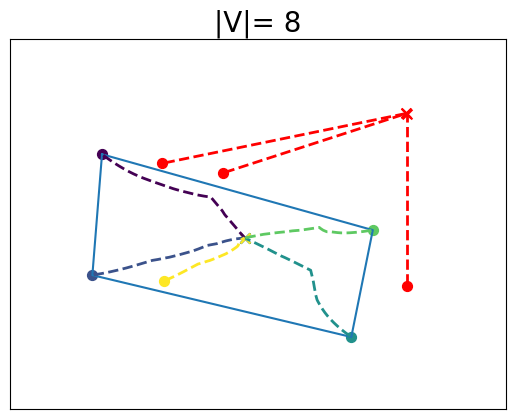

In [86]:
fig, ax = plt.subplots()
#fig2,ax2 = plt.subplots()

n = 8
offset = np.ones((n,2))*.5;
X= 10*(np.random.rand(n,2)-offset)
#X = np.array([(-3,-1), (-3, 4),(0.5 ,-4),(1.5,6),(3.5,2),(4,-1)]);
#X[n-1]= np.array((5,1))
attackers = [n-1]
if n >6:
    X[n-2] = np.array((6,-1))
    attackers = [n-2,n-1]
if n>9:
    X[n-3] = np.array((7,-3))
    attackers = [n-3,n-2,n-1];
attackers = [n-3,n-2,n-1];

Xn = np.zeros((n,8,2));
#Xn = np.zeros((8,8,2))
N = []
for i in range(n):
    retry = True
    while retry:
        q = 0
        nh = random.sample(range(8),8)
        for attacker in attackers:
            if attacker in nh:
                q= q+1
        if q==3:
            N.append(nh)
            Xn[i][:] = X[N[i]]
            retry = False
targethist = np.zeros((602,n,2));
   
f = len(attackers);
#imp = .5*np.ones((6,6))-.5*np.eye(6);
imp = 0.0;
colors= get_colors(n,f);
empty = False;


frames = [];
step = 0;
emptyCPIH = np.zeros((n,1));
Xhist = [];
Yhist = [];
hull = ConvexHull(X[0:n-f]);
xplot = [];
yplot = [];
ham = 0;
attackerTarget = [np.array((6,6)),np.array((6,6)),np.array((6,6))]
Bx = getPotRegions(X,imp);
imprecision = False
if imprecision:
    for j in range(n):
            x = []; y = [];
            for k in range(4):
                x.append(Bx[j,k,0]);
                y.append(Bx[j,k,1]);
            x.append(Bx[j,0,0]);
            y.append(Bx[j,0,1]);
                #ax.scatter(x,y)
            ax.plot(x,y,c= colors[j]);
imp = 0
for v in hull.vertices:
    xplot.append(X[v,0]);
    yplot.append(X[v,1]);
xplot.append(X[hull.vertices[0],0]);
yplot.append(X[hull.vertices[0],1]);
ax.plot(xplot,yplot,label = 'Conv('+r'$X_0$'+')');
for i in range(n-f):
    lbl = r'$v_{s1}$'.replace('s1',str(i+1));
    ax.scatter(X[i,0],X[i,1],c= colors[i], marker = 'o',label = lbl,s =50);

for idx in attackers:
    lbl = r'$v_f$'#+str(attackers.index(idx)+1);
    ax.scatter(X[idx,0],X[idx,1],c= colors[idx], marker = 'o',label = lbl,s = 50);
maxdist = np.zeros((1,602))
target = np.zeros((n,2));
targetdist=np.zeros((n,1));
snapshot= (0,80,160,240,300,600)
imphist = [];
tm = []
while not empty:
   
    #ax.cla();
   # ax.set_xlim(-7,7);
   # ax.set_ylim(-7,7);
    dt = .01;
    n = len(X);
    
    safeX= [];
    safeY=[];
    dist = 0;
    safe_point = np.array((0,0))
    for i in range(n):
        if i not in attackers:
                    Xn[i][:] = X[N[i]]#X+np.matlib.repmat(a,6,1);
        if i not in attackers:
            #safeX,safeY = CPIH_Safepoint(n,Bx,i);
          #  try:
            safe_point = find_hilbert_median(Xn[i]);
            targethist[step][i]=safe_point;
               # print("agent",i," has safepoint:",np.mean(safeX),", ",np.mean(safeY))
            #except:
                #safeX,safeY = [6,6]
                #print("no Safepoints")
            #CPIH = CPIH_Safepoint(n,Bx);
            #safeX,safeY = optConfig(Xn[i],i,imp);
            target[i] = safe_point
                    
               # emptyCPIH[i] =1;
            
        elif i in attackers:
            target[i] = attackerTarget[attackers.index(i)];
       
                
        

    for i in range(n):
        X[i]= X[i]+dt*(target[i]-X[i]);

    Xhist.append(X.copy());

    
    
    if step>600:
        empty = True;

  
    for i in range(n-len(attackers)):
        for j in range(n-len(attackers)):
            temp = np.linalg.norm(X[i]-X[j]);
            if temp> maxdist[0][step]:
                maxdist[0][step] = temp;
    step +=1;

for i in range(n):
    xplot = ExtractX(Xhist,i);
    yplot = ExtractY(Xhist,i);
    endn = len(xplot);
    ax.plot(xplot,yplot,c = colors[i],linestyle='dashed',linewidth= 2);
    ax.scatter(xplot[endn-1],yplot[endn-1],c = colors[i], marker='x',s=50);
ax.set_xlim(-6,9);
ax.set_ylim(-6,9);
ax.set_xticks([])
ax.set_yticks([])
plt.title('|V|= '+str(n),fontsize = 20);
plt.savefig("Centerpoint_trajectories_n"+str(n)+"_f"+str(f)+".jpg")

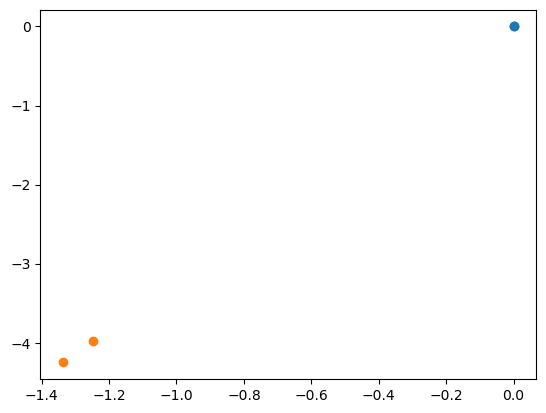

In [60]:
fig, ax = plt.subplots()
x = np.arange(len(Xhist))
ax.scatter(targethist[0][:][0], targethist[0][:][1]);
ax.scatter(Xhist[0][:][0],Xhist[0][:][1]);


In [68]:
print(targethist[5,:,0])

[0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
print(targethist)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
